### in progress...

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Загружаем и готовим данные

Датасет содержит информацию об играх, которых было продано более 100 тыс. копий.

<b>Описания колонок:</b>

+ Name - The games name
+ Platform - Platform of the games release (i.e. PC,PS4, etc.)
+ Year - Year of the game's release
+ Genre - Genre of the game
+ Publisher - Publisher of the game
+ NA_Sales - Sales in North America (in millions)
+ EU_Sales - Sales in Europe (in millions)
+ JP_Sales - Sales in Japan (in millions)
+ Other_Sales - Sales in the rest of the world (in millions)
+ Global_Sales - Total worldwide sales.


In [2]:
games = pd.read_csv('vgsales.csv', 
                    usecols=lambda x: x != 'Rank',
                    dtype={'Genre': 'category'}
                   )
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [48]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16598 non-null  object  
 1   Platform      16598 non-null  object  
 2   Year          16327 non-null  float64 
 3   Genre         16598 non-null  category
 4   Publisher     16598 non-null  object  
 5   NA_Sales      16598 non-null  float64 
 6   EU_Sales      16598 non-null  float64 
 7   JP_Sales      16598 non-null  float64 
 8   Other_Sales   16598 non-null  float64 
 9   Global_Sales  16598 non-null  float64 
dtypes: category(1), float64(6), object(3)
memory usage: 1.2+ MB


In [44]:
# ищем пропущенные значения
games.isna().any()

Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [45]:
print(sum(games['Publisher'] == 'Unknown'))
games['Publisher'].fillna('Unknown', inplace=True)
print(sum(games['Publisher'] == 'Unknown'))

203
261


In [46]:
games.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<b>Представленные жанры<b>

In [186]:
# сохраняю в дата фреймы для визуализации
genres_count = pd.DataFrame(games.value_counts('Genre'), columns=['count'])

genres_sales = pd.DataFrame(games.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales']]
                            .sum()
                            .reset_index(), 
                            columns=['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales'])

games.value_counts('Genre')

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
dtype: int64

<b>Платформы с наибольшим количеством игр</b>

In [54]:
games.value_counts('Platform').head(10)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
dtype: int64

<b>Издатели с наибольшим количеством игр</b>

In [165]:
publishers_count = pd.DataFrame(games.value_counts('Publisher').head(10), columns=['count']).reset_index()
games.value_counts('Publisher').head(10)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
dtype: int64

<b>Издатели с наибольшими количествами проданных копий (в млн.)</b>

In [78]:
publishers_sales = pd.DataFrame(games.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales']]
                                .sum(), 
                                columns=['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales']
                               ).reset_index()

games.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

<b>Период, охваченный в датасете</b>

In [58]:
games['Year'].agg(['min', 'max'])

min    1980.0
max    2020.0
Name: Year, dtype: float64

<b>Самая популярная игра в датасете</b>

In [147]:
games[games['Global_Sales'] == games['Global_Sales'].max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74



## Визуализируем данные

### Годы

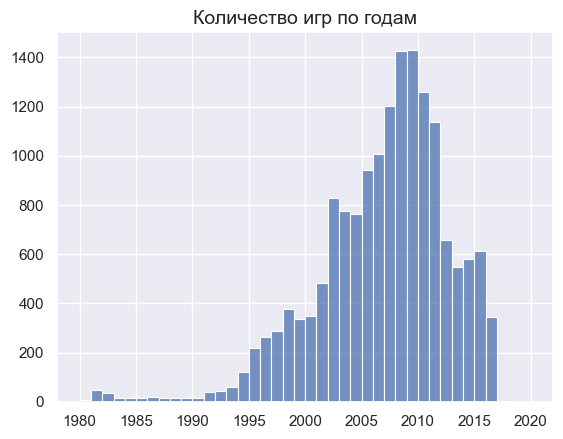

In [143]:
sns.set_theme(style="darkgrid")

sns.histplot(data=games, 
             x='Year', 
             binwidth=1
            )
plt.title('Количество игр по годам', fontdict={'fontsize': 14})
plt.xlabel(None)
plt.ylabel(None)

plt.show()

Позже 2016 лишь 4 строки:

In [46]:
print(games[games['Year'] > 2016][['Name', 'Year']])

                                                   Name    Year
5957                             Imagine: Makeup Artist  2020.0
14390  Phantasy Star Online 2 Episode 4: Deluxe Package  2017.0
16241  Phantasy Star Online 2 Episode 4: Deluxe Package  2017.0
16438                  Brothers Conflict: Precious Baby  2017.0


До сер. 1990-х также мало записей:

In [53]:
print(f'До 1995 г.: {sum(games["Year"] < 1995)} строк')
print(f'Дата не указана: {sum(games["Year"].isna())} строка')
print(f'Всего: {len(games)} строк')

До 1995 г.: 486 строк
Дата не указана: 271 строка
Всего: 16598 строк


50% наблюдений приходится на 2003-2010 гг.:

In [58]:
print(f"Первый квартиль: {int(games['Year'].quantile(0.25))} г.") 
print(f"Третий квартиль: {int(games['Year'].quantile(0.75))} г.")

Первый квартиль: 2003 г.
Третий квартиль: 2010 г.


### Издатели

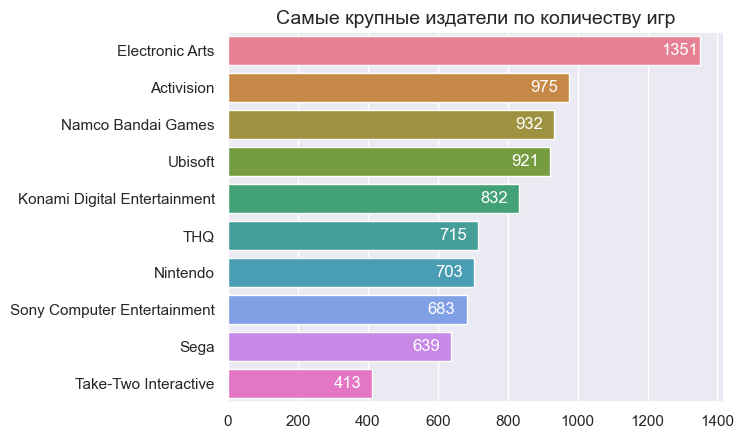

In [142]:
ax = sns.barplot(data=publishers_count,
            x='count',
            y='Publisher',
            orient='h',
            palette='husl'
           )

ax.bar_label(ax.containers[0], padding=-28, color='white')
plt.title('Самые крупные издатели по количеству игр', fontdict={'fontsize': 14})
plt.xlabel(None)
plt.ylabel(None)

plt.show()

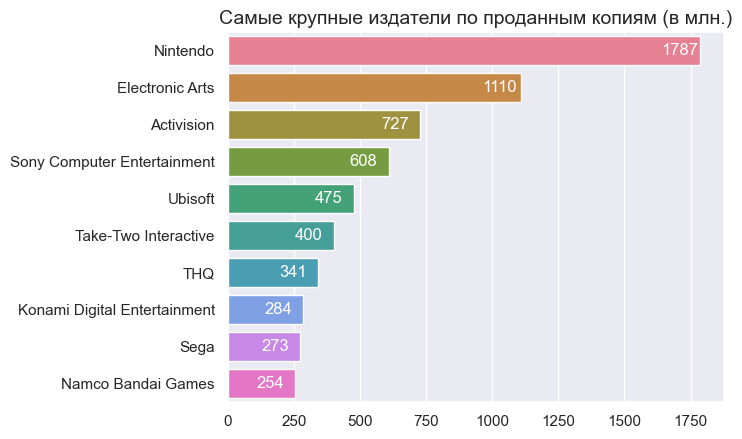

In [141]:
publishers_global_sales = (publishers_sales[['Publisher', 'Global_Sales']]
                           .sort_values('Global_Sales', ascending=False)
                           .head(10)
                          )
publishers_global_sales['Global_Sales'] = publishers_global_sales['Global_Sales'].apply(round)


ax = sns.barplot(data=publishers_global_sales,
            x='Global_Sales',
            y='Publisher',
            orient='h',
            palette='husl'
           )

ax.bar_label(ax.containers[0], padding=-28, color='white')
plt.title('Самые крупные издатели по проданным копиям (в млн.)', fontdict={'fontsize': 14})
plt.xlabel(None)
plt.ylabel(None)

plt.show()

Хотя Nintendo выпустили почти в 2 раза меньше игр чем Electronic Arts, они оказались первыми по сумме проданных копий, обогнав EA на 678 млн.

<b>Самые продаваемые игры Nintendo</b>

In [138]:
games[games['Publisher'] == 'Nintendo'].iloc[:, [0, 1, 2, 3, 9]].sort_values('Global_Sales', ascending=False).head(15)

,Name,Platform,Year,Genre,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,82.74
1,Super Mario Bros.,NES,1985.0,Platform,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37
5,Tetris,GB,1989.0,Puzzle,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,30.01
7,Wii Play,Wii,2006.0,Misc,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,28.62
9,Duck Hunt,NES,1984.0,Shooter,28.31


Основные драйверы Nintendo - игры для их консоли Wii, серии игр Mario и Pokemon, а также Tetris и Duck Hunt.

<b>Самые продаваемые игры Electronic Arts</b>

In [139]:
games[games['Publisher'] == 'Electronic Arts'].iloc[:, [0, 1, 2, 3, 9]].sort_values('Global_Sales', ascending=False).head(15)

,Name,Platform,Year,Genre,Global_Sales
77,FIFA 16,PS4,2015.0,Sports,8.49
82,FIFA Soccer 13,PS3,2012.0,Action,8.24
83,The Sims 3,PC,2009.0,Simulation,8.11
92,Star Wars Battlefront (2015),PS4,2015.0,Shooter,7.67
99,Battlefield 3,X360,2011.0,Shooter,7.34
103,Battlefield 3,PS3,2011.0,Shooter,7.23
104,Need for Speed Underground,PS2,2003.0,Racing,7.20
112,FIFA 14,PS3,2013.0,Sports,6.90
113,Need for Speed Underground 2,PS2,2004.0,Racing,6.90
114,Medal of Honor: Frontline,PS2,2002.0,Shooter,6.83


FIFA 16, самая продаваемая игра Electronic Arts на период, охваченный датасетом, продавалась тиражом в 10 раз меньше, чем Wii Sports у Nintendo.

<b>Динамика продаж у Nintendo и Electronic Arts</b>

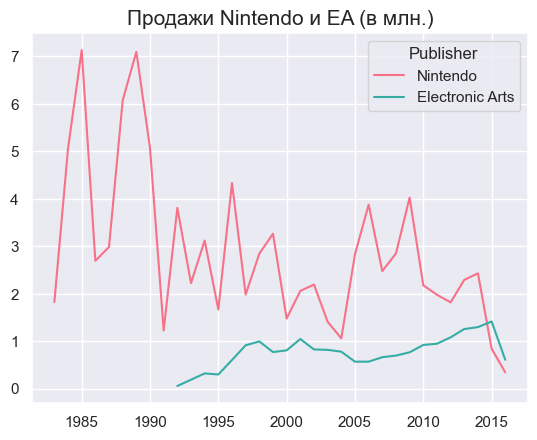

In [130]:
games_nintendo_ea = games[games['Publisher'].isin(['Nintendo', 'Electronic Arts'])]

sns.lineplot(data=games_nintendo_ea,
             x='Year',
             y='Global_Sales',
             hue='Publisher',
             ci=None,
             palette='husl'
            )
plt.title('Продажи Nintendo и EA (в млн.)', fontdict={'fontsize': 15})
plt.xlabel(None)
plt.ylabel(None)

plt.show()

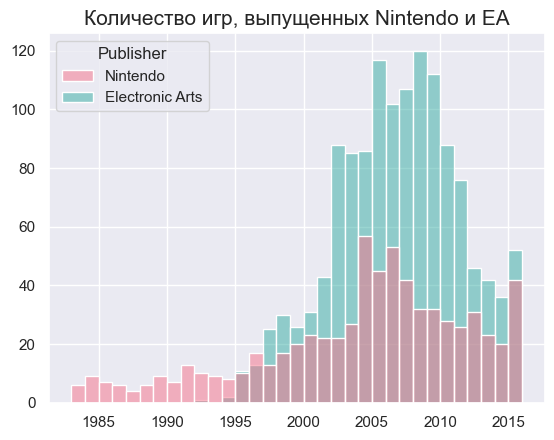

In [136]:
sns.histplot(data=games_nintendo_ea, 
             x='Year', 
             binwidth=1,
             hue='Publisher',
             alpha=0.5,
             palette='husl'
            )
plt.title('Количество игр, выпущенных Nintendo и EA', fontdict={'fontsize': 15})
plt.xlabel(None)
plt.ylabel(None)

plt.show()

### Жанры

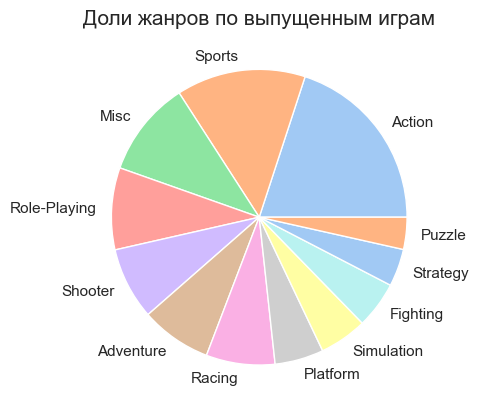

In [175]:
colors = sns.color_palette('pastel')

plt.pie(data=genres_count,
        x='count',
        labels=genres_count.index,
        colors=colors
       )
plt.title('Доли жанров по выпущенным играм', fontdict={'fontsize': 15})

plt.show()

Больше всего в датасете игр в жанрах экшен и спорт.